<a href="https://colab.research.google.com/github/prudviraj939/braintumor_detection/blob/main/braintumordetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Modern AI Portfolio Builder/Healthcare AI /Brain_MRI

/content/drive/My Drive/Colab Notebooks/Modern AI Portfolio Builder/Healthcare AI /Brain_MRI


In [ ]:
brain_df = pd.read_csv('data_mask.csv')

In [ ]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [ ]:
brain_df.columns

Index(['patient_id', 'image_path', 'mask_path', 'mask'], dtype='object')

In [ ]:
brain_df.head(50)

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
5,TCGA_CS_5395_19981004,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1_...,0
6,TCGA_CS_5395_19981004,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1_...,0
7,TCGA_CS_5395_19981004,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1_...,0
8,TCGA_CS_5395_19981004,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1_...,0
9,TCGA_CS_5395_19981004,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1_...,0


In [ ]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

In [ ]:
brain_df['mask'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(120,100,50)', marker_line_color = 'rgb(0,255,200)', marker_line_width = 7, opacity = 0.5)
fig.show()

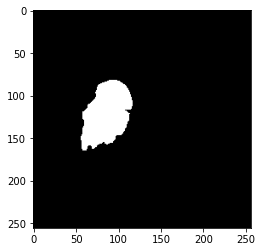

In [ ]:
plt.imshow(cv2.imread(brain_df.mask_path[771]))

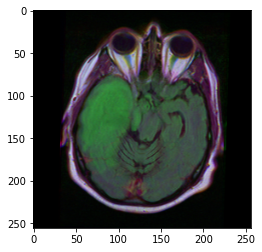

In [ ]:
plt.imshow(cv2.imread(brain_df.image_path[771]))

In [ ]:
brain_df.mask_path[brain_df['mask'] == 1].head(50)

445    TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5_...
507    TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5_...
551    TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6_...
555    TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6_...
617    TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6_...
619    TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_6_...
623    TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_6_...
633    TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_6_...
661    TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_7_...
665    TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_7_...
667    TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_7_...
676    TCGA_CS_6290_20000917/TCGA_CS_6290_20000917_7_...
723    TCGA_FG_A4MT_20020212/TCGA_FG_A4MT_20020212_7_...
727    TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_7_...
729    TCGA_HT_7602_19951103/TCGA_HT_7602_19951103_7_...
733    TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_7_...
739    TCGA_HT_7686_19950629/TCGA_HT_7686_19950629_7_...
743    TCGA_HT_7884_19980913/TC

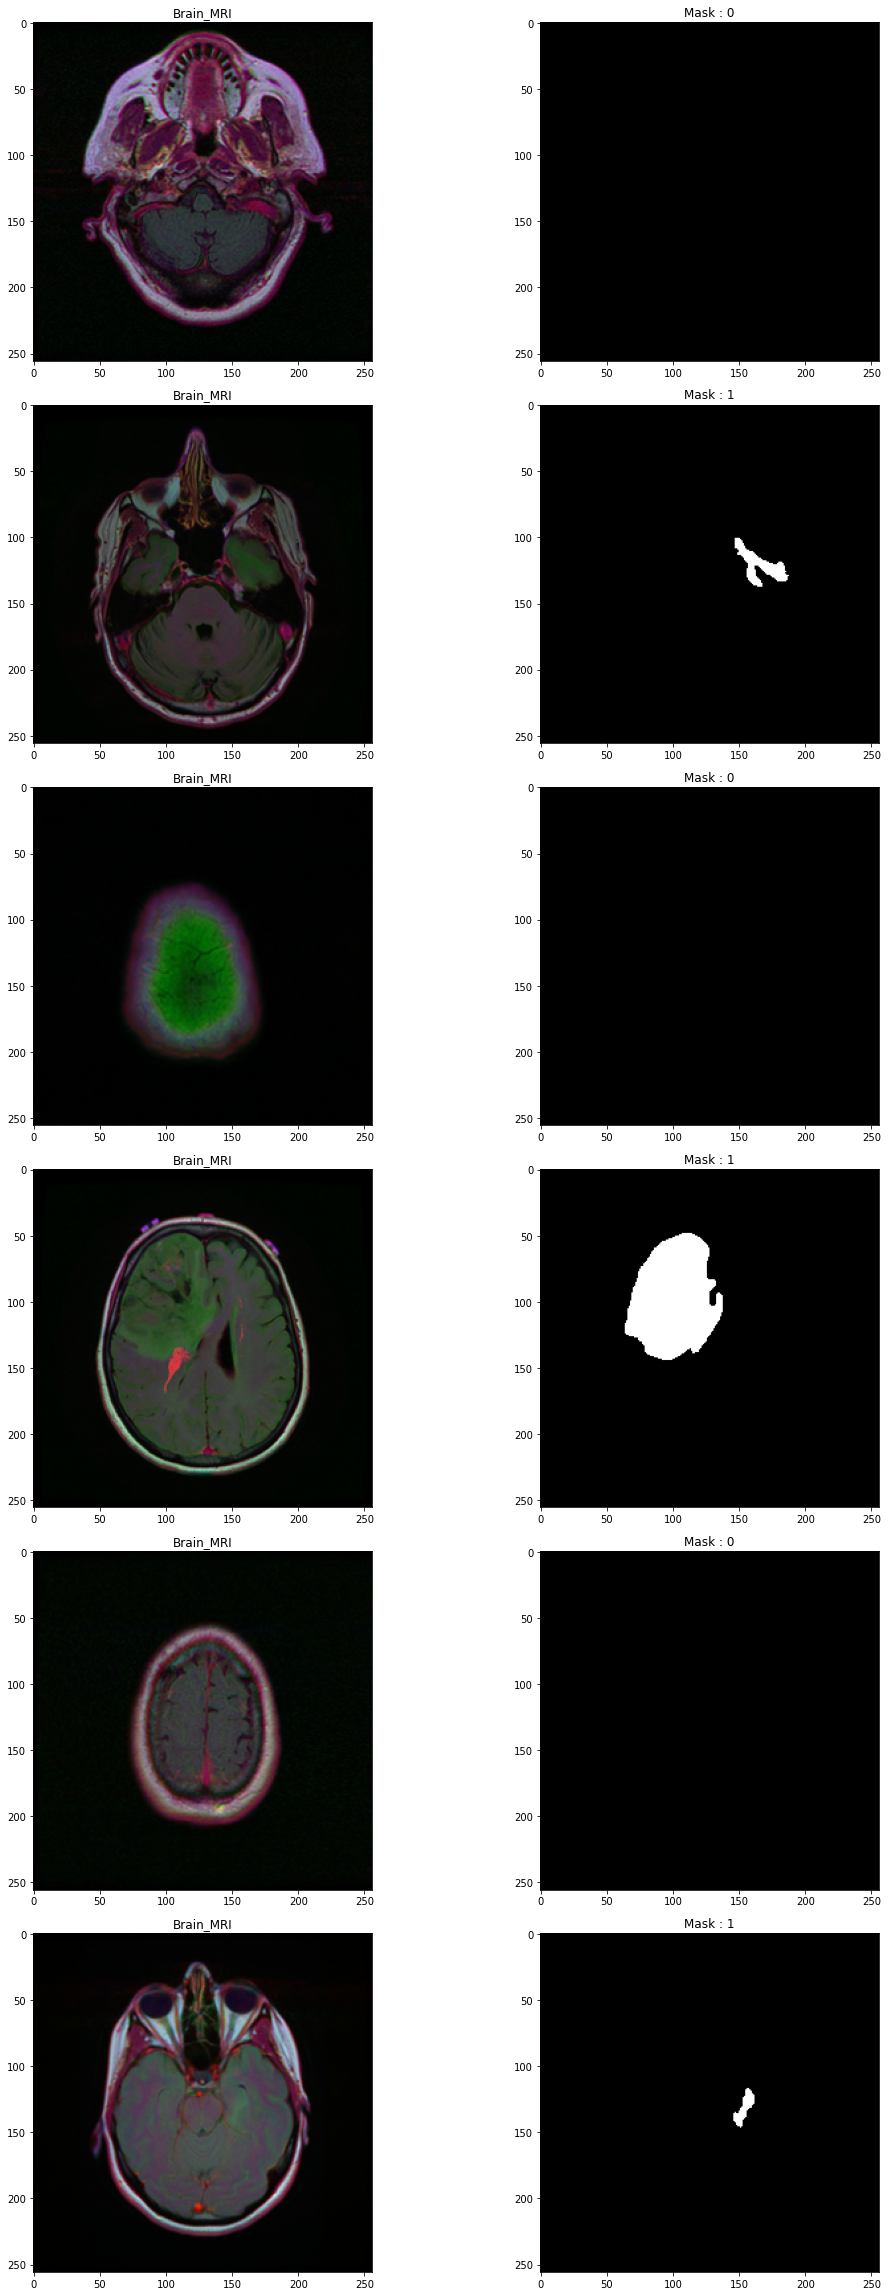

In [ ]:
import random
fig, axs = plt.subplots(6,2, figsize = (16,32))
count = 0

for x in range(6):
  i = random.randint(0, len(brain_df))
  axs[count][0].title.set_text('Brain_MRI')
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i]))
  axs[count][1].title.set_text("Mask : "+str(brain_df['mask'][i]))
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i]))
  count += 1
fig.tight_layout()

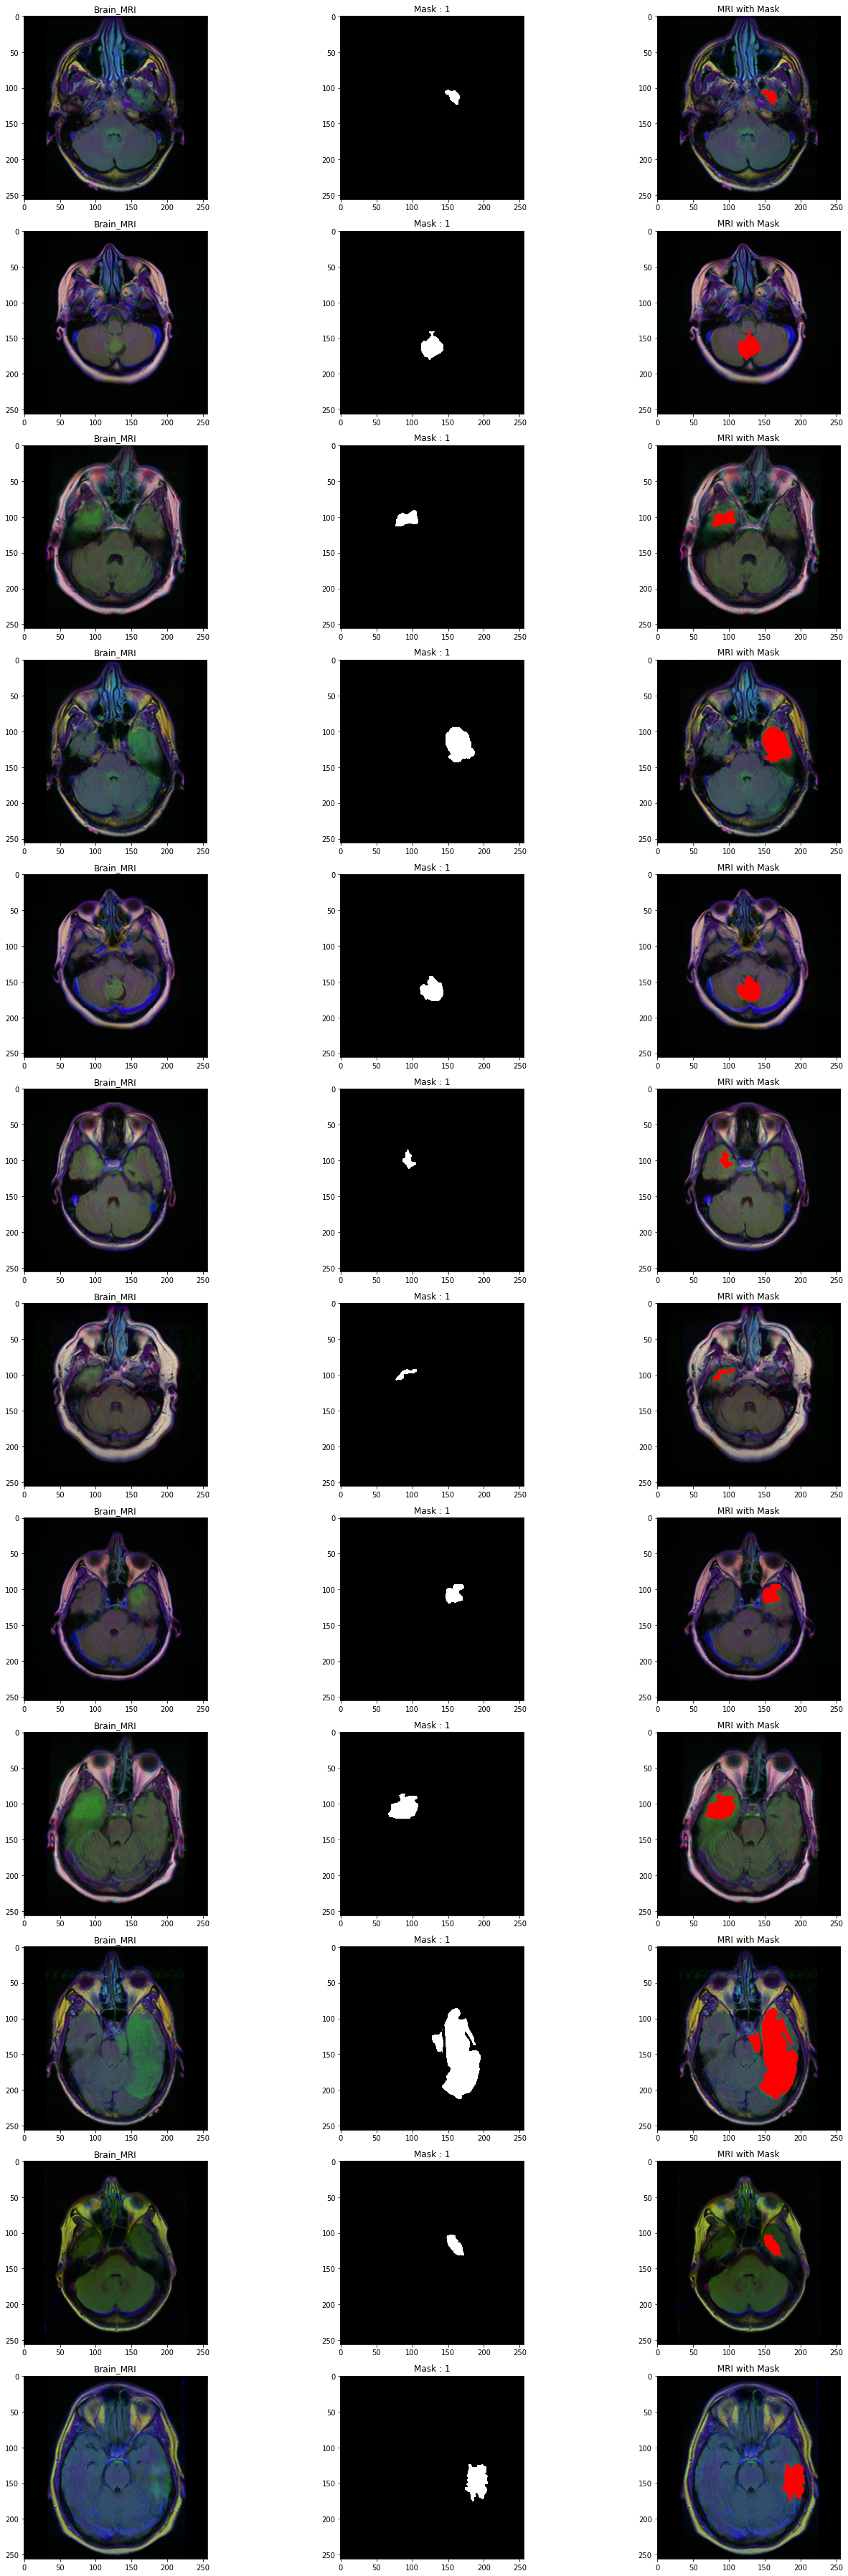

In [ ]:
fig, axs = plt.subplots(12,3, figsize = (20,50))
count = 0

for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:
    img = io.imread(brain_df.image_path[i])
    axs[count][0].title.set_text('Brain_MRI')
    axs[count][0].imshow(img)

    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask : "+str(brain_df['mask'][i]))
    axs[count][1].imshow(mask, cmap = 'gray')

    img[mask == 255] = (255, 0, 0)
    axs[count][2].title.set_text('MRI with Mask')
    axs[count][2].imshow(img)
    count += 1
  
  
fig.tight_layout()

In [ ]:
brain_df_train = brain_df.drop(columns=['patient_id'])
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x : str(x))
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [ ]:
from sklearn.model_selection import  train_test_split
train, test = train_test_split(brain_df_train, test_size = 0.15)

from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.15)

In [ ]:
train_generator = datagen.flow_from_dataframe(
    dataframe = train,
    directory = './',
    x_col = 'image_path',
    y_col = 'mask',
    subset = "training",
    batch_size = 16,
    shuffle = True,
    class_mode = "categorical",
    target_size = (256,256))

valid_generator = datagen.flow_from_dataframe(
    dataframe = train,
    directory = './',
    x_col = 'image_path',
    y_col = 'mask',
    subset = "validation",
    batch_size = 16,
    shuffle = True,
    class_mode = "categorical",
    target_size = (256,256))

test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test,
    directory = './',
    x_col = 'image_path',
    y_col = 'mask',
    subset = "training",
    batch_size = 16,
    shuffle = False,
    class_mode = "categorical",
    target_size = (256,256))

Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [ ]:
basemodel = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(256,256,3)))
basemodel.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
for layer in basemodel.layers:
  layers.trainable = False

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation='softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=20)
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose = 1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch=train_generator.n//16,  epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

177/177 [==============================] - ETA: 0s - loss: 0.7289 - accuracy: 0.6961
Epoch 00001: val_loss improved from inf to 1.07499, saving model to classifier-resnet-weights.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



177/177 [==============================] - 1672s 9s/step - loss: 0.7289 - accuracy: 0.6961 - val_loss: 1.0750 - val_accuracy: 0.3347


In [ ]:
model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



In [ ]:
with open('resnet-50-MRI.json', 'r') as json_file:
  json_savedModel = json_file.read()

model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
test_predict = model.predict(test_generator, steps=test_generator.n//16, verbose=1)

36/36 [==============================] - 268s 8s/step


In [ ]:
test_predict

array([[2.0982862e-01, 7.9017138e-01],
       [1.0000000e+00, 2.7006534e-08],
       [9.9999964e-01, 3.2053262e-07],
       ...,
       [8.7256268e-02, 9.1274375e-01],
       [1.0000000e+00, 1.7458310e-10],
       [1.8011843e-01, 8.1988162e-01]], dtype=float32)

In [ ]:
predict = []
for i in test_predict:
  predict.append(str(np.argmax(i)))
predict = np.asarray(predict)
predict

array(['1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1',
       '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0

In [ ]:
original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(original, predict)
accuracy

0.984375

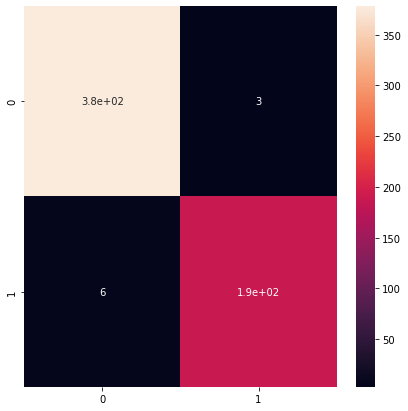

In [ ]:
cm = confusion_matrix(original, predict)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)

In [ ]:
report = classification_report(original, predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       381
           1       0.98      0.97      0.98       195

   micro avg       0.98      0.98      0.98       576
   macro avg       0.98      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [ ]:
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(1373, 4)

In [ ]:
from sklearn.model_selection import  train_test_split

X_train, X_val = train_test_split(brain_df_mask, test_size = 0.15)
X_test, X_val = train_test_split(X_val, test_size = 0.5)

In [ ]:
X_train.shape

(1167, 4)

In [ ]:
train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask = list(X_val.mask_path)

In [ ]:
from utilities import  DataGenerator
training_generator = DataGenerator(train_ids,train_mask)
validation_generator = DataGenerator(val_ids,val_mask)

In [ ]:
def resblock(X, f):

  X_copy = X

  #main path
  X = Conv2D(f, kernel_size=(1,1), strides=(1,1), kernel_initializer='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X)

  X = Conv2D(f, kernel_size=(3,3), strides=(1,1), padding = 'same', kernel_initializer='he_normal')(X)
  X = BatchNormalization()(X)

  #short path
  X_copy = Conv2D(f, kernel_size=(1,1), strides=(1,1), kernel_initializer='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

  #Add
  X = Add()([X, X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [ ]:
input_shape = (256,256,3)

# Input tensor shape
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )

In [ ]:
model_seg.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
from utilities import  focal_tversky, tversky_loss, tversky

adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer=adam, loss = focal_tversky, metrics = [tversky])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
checkpointer = ModelCheckpoint(filepath="ResUNet-weights.hdf5", verbose=1, save_best_only=True)
history = model_seg.fit(training_generator, epochs = 1, validation_data = validation_generator, callbacks = [checkpointer, earlystopping])

TypeError: ignored